In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_mlp = pd.read_csv("df_euca_bert.csv")

In [3]:
df_mlp

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..Eucalyptol
0,2,0.127047,0.111979,0.549845,0.036660,0.026879,-0.309649,0.654963,0.205110,-0.097057,...,0.146141,0.174652,-0.146565,0.217158,-0.712819,0.046792,-0.744437,-0.214183,-0.707376,0.0
1,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.0
2,6,0.228885,0.109906,0.588899,0.070310,0.026625,-0.370848,0.754401,0.215168,-0.129841,...,0.165573,0.127164,-0.140357,0.235097,-0.730830,0.103537,-0.790641,-0.174511,-0.783329,0.0
3,6,0.228885,0.109906,0.588899,0.070310,0.026625,-0.370848,0.754401,0.215168,-0.129841,...,0.165573,0.127164,-0.140357,0.235097,-0.730830,0.103537,-0.790641,-0.174511,-0.783329,0.0
4,8,0.300818,0.117299,0.643727,0.152582,0.012138,-0.430934,0.801716,0.031614,-0.120514,...,0.128118,0.140427,-0.141514,0.348772,-0.738661,0.141317,-0.830303,-0.177379,-0.900806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42956,0.314332,0.136019,0.670931,0.158752,0.030549,-0.452638,0.806557,-0.023362,-0.134088,...,0.119488,0.145497,-0.101374,0.402608,-0.741569,0.173357,-0.846830,-0.148109,-0.883264,0.0
74996,42956,0.314332,0.136019,0.670931,0.158752,0.030549,-0.452638,0.806557,-0.023362,-0.134088,...,0.119488,0.145497,-0.101374,0.402608,-0.741569,0.173357,-0.846830,-0.148109,-0.883264,0.0
74997,42970,0.109320,0.095256,0.523631,-0.007430,0.055264,-0.338708,0.570877,0.232808,-0.009438,...,0.124365,0.174935,-0.110914,0.197620,-0.678949,0.039182,-0.663883,-0.163899,-0.593018,0.0
74998,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.0


In [4]:
X = df_mlp.drop(['index', 'X..Eucalyptol'], axis = 1)
y = df_mlp[['X..Eucalyptol']]

Plotting histograms on target variable

<AxesSubplot:ylabel='Count'>

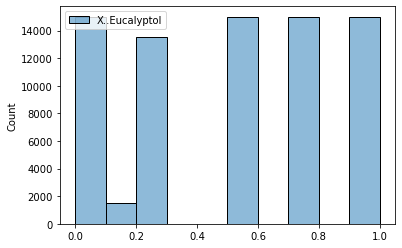

In [5]:
sns.histplot(y, bins = 10)

PCA

In [6]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [7]:
pca_comps

array([[ 1.07690584e+00, -8.09327452e-01,  1.83620458e-01, ...,
         5.00334479e-03,  6.92544397e-04, -5.25469616e-09],
       [ 2.17125322e+00, -5.60577755e-01,  2.39830357e-02, ...,
        -2.79541703e-03, -5.91248379e-03,  2.53449217e-08],
       [-2.18127714e-01, -5.19243076e-01,  1.19228722e-01, ...,
         1.85510448e-03, -1.69693759e-03, -3.02390352e-08],
       ...,
       [ 2.86167496e+00, -2.27426744e-01, -3.18167597e-01, ...,
        -1.43427980e-03,  8.46308218e-04, -1.32293619e-09],
       [ 1.49918531e+00, -5.69989640e-01, -5.29718411e-01, ...,
        -7.83810783e-04, -2.19753560e-03, -1.60390347e-08],
       [-1.69972720e+00,  3.80817040e-01, -2.85989409e-01, ...,
         2.70036970e-03,  2.77478951e-03, -4.33583608e-08]])

In [8]:
type(pca_comps)

numpy.ndarray

In [9]:
explained_variance = pca.explained_variance_ratio_

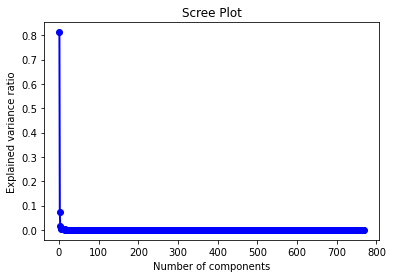

In [10]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [11]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [12]:
n_components_optimal

1

In [13]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [14]:
X_reduced

array([[ 1.07690584],
       [ 2.17125322],
       [-0.21812771],
       ...,
       [ 2.86167496],
       [ 1.49918531],
       [-1.6997272 ]])

train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [16]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

MLP (before feature selection and hyperparameter tuning)

In [17]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
mean_absolute_error(y_val, y_pred_mlp)

0.3087918445651765

In [19]:
mean_squared_error(y_val, y_pred_mlp)

0.1258313785624436

In [20]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.35472718892473354

In [21]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.003656590830556916

In [22]:
#val
r2_score(y_val, y_pred_mlp)

0.003735833638418118

Hyperparameter tuning (MLP)

In [23]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [24]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [25]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [26]:
rscv.best_params_

{'max_iter': 500, 'hidden_layer_sizes': (100,), 'activation': 'relu'}

In [27]:
joblib.dump(rscv, "rscv_mlp_bert_euca.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_bert_best_params_euca.pkl")

['rscv_mlp_bert_best_params_euca.pkl']

kNN (after hyperparameter tuning)

In [28]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=500, activation = 'relu', hidden_layer_sizes= (100,), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.3087918445651765

In [30]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.1258313785624436

In [31]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.35472718892473354

In [32]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.003656590830556916

In [33]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.003735833638418118

Predicting on the test set (MLP)

In [34]:
y_pred_mlp_test = mlpreg_ht.predict(X_test)

In [35]:
joblib.dump(y_pred_mlp_test, "y_pred_mlp_test_bert_euca.pkl")
joblib.dump(y_test, "y_test_mlp_bert_euca.pkl")

['y_test_mlp_bert_euca.pkl']

In [36]:
mean_absolute_error(y_test, y_pred_mlp_test)

0.3068858978965988

In [37]:
mean_squared_error(y_test, y_pred_mlp_test)

0.12512851380224022

In [38]:
mean_squared_error(y_test, y_pred_mlp_test, squared = False)

0.35373508986562274

In [39]:
r2_score(y_test, y_pred_mlp_test)

0.0037321303022143093

Error analysis (kNN)

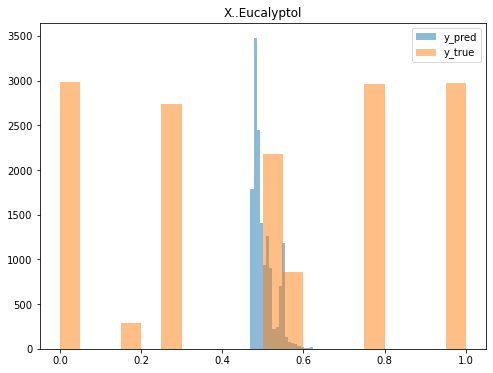

<Figure size 432x288 with 0 Axes>

In [40]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Eucalyptol"  # specify the target variable name
ax.hist(y_pred_mlp_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_bert_euca.png')

Pearson R

In [41]:
corr_coef, p_value = pearsonr(y_pred_mlp_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.062
P-value: 0.000


<AxesSubplot:>

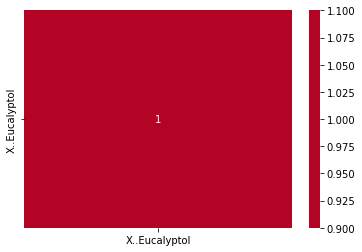

In [42]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)